In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# add root path (parent folder) to path
import os
import sys
cwd = os.getcwd()
root_path = os.path.abspath(os.path.join(cwd, os.pardir))
sys.path.insert(0, root_path)

import pysta
import stcl

import os

%load_ext autoreload
%autoreload 2

In [2]:
def remove_box():
    # remove top & right box
    # https://stackoverflow.com/a/28720127
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
# ANOVA
# https://www.pythonfordatascience.org/anova-python/
from scipy import stats
def do_anova(df, col, key='contrast', key_values=[50, 80, 100]):
    return stats.f_oneway(df[col][df[key] == key_values[0]],
                           df[col][df[key] == key_values[1]],
                           df[col][df[key] == key_values[2]])

## run for all cells (OFF LINE)

datasets: Gaussian stim with diffent contrasts

run
```
python3 stcl_batch.py --contrast 50
python3 stcl_batch.py --contrast 80
python3 stcl_batch.py --contrast 100
```

## read clustering results

In [3]:

results_path = os.path.join(root_path,'results')



contrasts = [50, 80, 100]
tap = 8 # -700 ms ~ 0
cluster_dim = 2

dfs = []
for contrast in contrasts:

#     folder_name = "results/gaussian_stim_contrast{}_tap{}_cluster_dim{}".format(contrast, tap, cluster_dim)
    filename = os.path.join(results_path, "gaussian_stim_contrast{}_tap{}_cluster_dim{}".format(contrast, tap, cluster_dim), "clusters.csv")

    clusters = pd.read_csv(filename)
    # weights
    # weights.head()

    clusters['contrast'] = contrast
    clusters["max_weight"] = np.maximum(clusters["weight1"], clusters["weight2"])
    
    
    dfs.append(clusters)

    
clusters_all = pd.concat(dfs)
# # combine number of samples
# clusters = clusters.merge(num_samples_df, on="channel_name") #, how="outer")

# # combine largest eigen values
# clusters = clusters.merge(largest_eigen_values_df, on="channel_name", how="outer")


# filename = os.path.join(folder_name, "clusters_combined.csv")
# clusters.to_csv(filename, index=None)

Text(0.5, 1.0, 'ANOVA p=0.00')

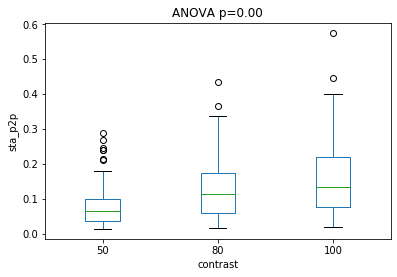

In [4]:
col = 'sta_p2p'
clusters_all.boxplot(col, by='contrast', grid=False)
plt.title(None)
plt.ylabel(col)
# remove_box()

val, p = do_anova(clusters_all, col)
plt.suptitle('')
plt.title ('ANOVA p={:.2f}'.format(p))

# plt.savefig(os.path.join(data_path, 'figure', 'sta_p2p_vs_contrast.png'), dpi=150)

In [5]:
# print(len(clusters_all)/3)
# clusters_all['cell_type'].value_counts()

In [6]:
idx_on = clusters_all['cell_type']=='ON'
idx_off = clusters_all['cell_type']=='OFF'
idx_on_off = clusters_all['cell_type']== 'ON-OFF'



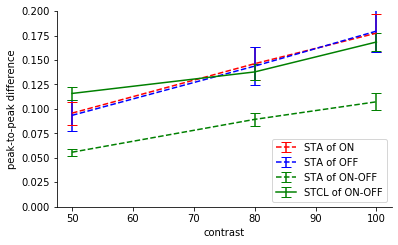

In [41]:
plt.figure(figsize=(6,3.6))
# plt.figure(figsize=(5,3.5))

key = 'contrast'
col = 'sta_p2p'

colors = ['r','b','g']
linestyles = ['--', '--', '--']
for i, idx in enumerate([idx_on, idx_off, idx_on_off]):
    plt.errorbar([50, 80, 100], clusters_all.loc[idx,:].groupby(key)[col].mean(), clusters_all.loc[idx,:].groupby(key)[col].sem(),
                 linestyle=linestyles[i], color=colors[i], capsize=5)

# all centers 
# combine two centers
centers_all = pd.concat([clusters_all[['channel_name', 'cell_type', 'contrast', 'center0_p2p']].rename(columns={'center0_p2p': 'center_p2p'}),
                        clusters_all[['channel_name', 'cell_type', 'contrast', 'center1_p2p']].rename(columns={'center1_p2p': 'center_p2p'})])

idx = centers_all['cell_type'] == 'ON-OFF'

col = 'center_p2p'
plt.errorbar([50, 80, 100], centers_all.loc[idx,:].groupby(key)[col].mean(), centers_all.loc[idx,:].groupby(key)[col].sem(),
             color=colors[i], capsize=5)

# col = 'center0_p2p'
# plt.errorbar([50, 80, 100], clusters_all.loc[idx,:].groupby(key)[col].mean(), clusters_all.loc[idx,:].groupby(key)[col].sem(),
#              color=colors[i], capsize=5)

# col = 'center1_p2p'
# plt.errorbar([50, 80, 100], clusters_all.loc[idx,:].groupby(key)[col].mean(), clusters_all.loc[idx,:].groupby(key)[col].sem(),
#              color=colors[i], capsize=5)
    
plt.xlabel('contrast')
plt.ylabel(col)
plt.legend(['STA of ON ', 'STA of OFF', 'STA of ON-OFF', 'STCL of ON-OFF'])


# print(do_anova(clusters_all.loc[idx_on,:], col))
# print(do_anova(clusters_all.loc[idx_off,:], col))
# print(do_anova(clusters_all.loc[idx_on_off,:], col))
remove_box()

plt.ylim([0, 0.2])

plt.ylabel('peak-to-peak difference')

plt.savefig('figure/contrast_vs_peak_diff.png')
plt.savefig('figure/contrast_vs_peak_diff.pdf')

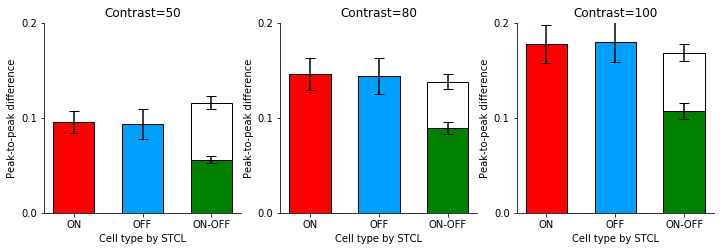

In [140]:
# re-plot separately for each contrast

plt.figure(figsize=(12,3.5))
# plt.figure(figsize=(5,3.5))

edgecolor = 'k'

# STA p2p for a contrast level
for i, contrast in enumerate([50, 80, 100]):
    plt.subplot(1,3,i+1)

    key = ['contrast', 'cell_type']
    col = 'sta_p2p'

    sta_p2p_means = clusters_all.groupby(key)[col].mean()[contrast]
    sta_p2p_sems = clusters_all.groupby(key)[col].sem()[contrast]

    # # plot each
    sta_cell_types = ['ON','OFF','ON-OFF']
#     sta_colors = ['r','#00A0FF','#00FF00']
    sta_colors = ['r','#00A0FF','g']
    # plt.bar(sta_cell_types, sta_p2p_means[sta_cell_types], yerr=sta_p2p_sems[sta_cell_types], color=sta_colors, capsize=5)


    # center p2p 
    col = 'center_p2p'
    center_p2p_means = centers_all.groupby(key)[col].mean()[contrast]
    center_p2p_sems = centers_all.groupby(key)[col].sem()[contrast]

    # # plot each
#     cluster_cell_types = ['ON-OFF']
    cluster_colors = ['None']    
#     cluster_colors = ['g']
    # # cluster_cell_types = ['ON','OFF','ON-OFF']
    # # cluster_colors = ['r','#00A0FF','g']

    # plt.figure(figsize=(5,3.5))
    # plt.bar(cluster_cell_types, center_p2p_means[cluster_cell_types], yerr=center_p2p_sems[cluster_cell_types], color=cluster_colors, capsize=5)


    # plot together
#     plt.figure(figsize=(5,3.5))


    all_cell_types = ['ON', 'OFF', 'ON-OFF', 'ON-OFF']
    # all_cell_types = ['ON', 'OFF', 'ON-OFF', 'ON (STCL)', 'OFF (STCL)', 'ON-OFF (STCL)']
    plt.bar(all_cell_types, sta_p2p_means[sta_cell_types].to_list() + center_p2p_means[cluster_cell_types].to_list(), 
            yerr= sta_p2p_sems[sta_cell_types].to_list() + center_p2p_sems[cluster_cell_types].to_list(), 
            edgecolor=edgecolor, width=0.6,
            color=sta_colors+cluster_colors, capsize=5)

    plt.ylim(0, 0.2)
    plt.yticks([0, 0.1, 0.2])

    plt.title('Contrast={:.0f}'.format(contrast))
    plt.xlabel('Cell type by STCL')
    plt.ylabel('Peak-to-peak difference')
    remove_box()

    
plt.savefig('figure/contrast_vs_peak_diff.png', dpi=300)
plt.savefig('figure/contrast_vs_peak_diff.pdf')    

In [99]:
sta_p2p_means[sta_cell_types].to_list() + center_p2p_means[cluster_cell_types].to_list()

[0.09572894548364574,
 0.09348001347618555,
 0.055791000983305854,
 0.14526760840077782,
 0.16674949615561818,
 0.11584637322112584]

In [100]:
sta_p2p_sems[sta_cell_types].to_list() + center_p2p_sems[cluster_cell_types].to_list()

[0.011664363459148981,
 0.015992720275882177,
 0.0036864997706900333,
 0.011212656385770507,
 0.021521973527247867,
 0.006550065882902588]

In [97]:
sta_cell_types + cluster_cell_types

['ON', 'OFF', 'ON-OFF', 'ON', 'OFF', 'ON-OFF']

In [78]:
cluster_all

NameError: name 'cluster_all' is not defined

In [54]:
cell_types = ['ON','OFF','ON-OFF']

key = ['contrast', 'cell_type']
clusters_all.groupby(key)[col].mean()[50][cell_types]#[(50,'ON'),(50,'OFF')]#['OFF']


cell_type
ON        0.095729
OFF       0.093480
ON-OFF    0.055791
Name: sta_p2p, dtype: float64

Text(0, 0.5, 'peak-to-peak difference')

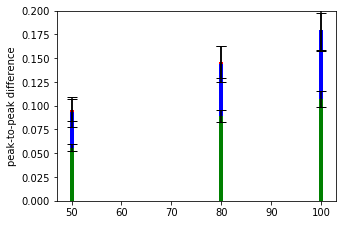

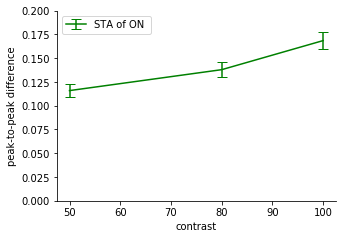

In [23]:
    
    # all centers 
# combine two centers
centers_all = pd.concat([clusters_all[['channel_name', 'cell_type', 'contrast', 'center0_p2p']].rename(columns={'center0_p2p': 'center_p2p'}),
                        clusters_all[['channel_name', 'cell_type', 'contrast', 'center1_p2p']].rename(columns={'center1_p2p': 'center_p2p'})])

idx = centers_all['cell_type'] == 'ON-OFF'


plt.ylim([0, 0.2])

plt.ylabel('peak-to-peak difference')

plt.figure(figsize=(5,3.5))
col = 'center_p2p'
plt.errorbar([50, 80, 100], centers_all.loc[idx,:].groupby(key)[col].mean(), centers_all.loc[idx,:].groupby(key)[col].sem(),
             color=colors[i], capsize=5)

# col = 'center0_p2p'
# plt.errorbar([50, 80, 100], clusters_all.loc[idx,:].groupby(key)[col].mean(), clusters_all.loc[idx,:].groupby(key)[col].sem(),
#              color=colors[i], capsize=5)

# col = 'center1_p2p'
# plt.errorbar([50, 80, 100], clusters_all.loc[idx,:].groupby(key)[col].mean(), clusters_all.loc[idx,:].groupby(key)[col].sem(),
#              color=colors[i], capsize=5)
    
plt.xlabel('contrast')
plt.ylabel(col)
plt.legend(['STA of ON ', 'STA of OFF', 'STA of ON-OFF', 'STCL of ON-OFF'])


# print(do_anova(clusters_all.loc[idx_on,:], col))
# print(do_anova(clusters_all.loc[idx_off,:], col))
# print(do_anova(clusters_all.loc[idx_on_off,:], col))
remove_box()

plt.ylim([0, 0.2])

plt.ylabel('peak-to-peak difference')

# plt.savefig('figure/contrast_vs_peak_diff.png')
# plt.savefig('figure/contrast_vs_peak_diff.pdf')

## statistical test for each contrast

ON or OFF vs. ON-OFF

In [8]:
idx_on_or_off = np.logical_or(idx_on, idx_off)
np.sum(idx_on), np.sum(idx_off), np.sum(idx_on_or_off)
clusters_on_or_off = clusters_all.loc[idx_on_or_off]
clusters_on_or_off.head()

,channel_name,num_spikes,cell_type,sta_p2p,sta_std,eig1,eig2,eig3,converged,center0_p2p,center0_std,center1_p2p,center1_std,weight1,weight2,inner_product,contrast,max_weight
1,ch_13a,23449,ON,0.015210,0.002606,0.096227,0.096015,0.095343,True,0.070105,0.010932,0.071305,0.011778,0.509035,0.490965,-0.058905,50,0.509035
2,ch_13b,8303,ON,0.027597,0.003773,0.107500,0.106082,0.105627,True,0.071176,0.012111,0.088342,0.012329,0.502551,0.497449,-0.061810,50,0.502551
3,ch_14a,15924,ON,0.015764,0.002658,0.095412,0.094184,0.093359,True,0.065309,0.011196,0.067404,0.011326,0.497300,0.502700,-0.057665,50,0.502700
5,ch_14c,3866,OFF,0.029373,0.004820,0.126926,0.126190,0.125348,True,0.093517,0.013733,0.084839,0.013304,0.485738,0.514262,-0.069757,50,0.514262
6,ch_16a,18372,ON,0.016734,0.002264,0.091721,0.091266,0.090291,True,0.073861,0.010783,0.070855,0.011217,0.506555,0.493445,-0.056643,50,0.506555


0.095080948125564 0.009424104816820654  vs  0.13798588417875882 0.006792451276445197
p= nan
0.14554212709945083 0.012998198100019936  vs  0.17573721419846547 0.007654605720267443
p= 0.04797541171319076
0.1780799361508884 0.0151762301212536  vs  0.2224956928916773 0.011349799773927275
p= 0.02061012151311318


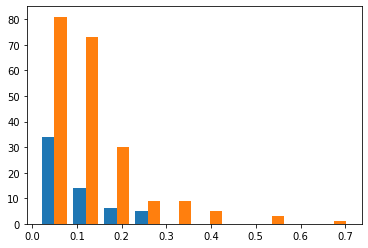

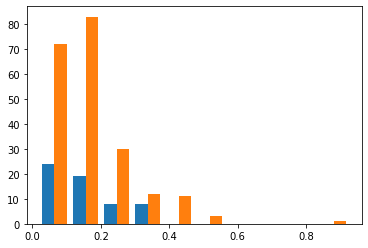

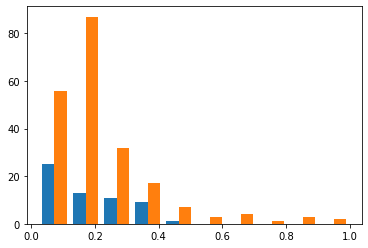

In [9]:
ps = list()
for contrast in contrasts:
    data1 = clusters_on_or_off.loc[clusters_on_or_off['contrast']==contrast,'sta_p2p']
    data2 = centers_all.loc[centers_all['contrast']==contrast, 'center_p2p']

    plt.figure()
    plt.hist([data1, data2])

    print(data1.mean(), data1.sem(), ' vs ', data2.mean(), data2.sem())
    tmp, p = stats.ttest_ind(data1.to_list(), data2.to_list(), equal_var=False)
    #tmp, p = stats.ttest_ind_from_stats(data1.mean(), data1.std(), len(data1), data2.mean(), data2.std(), len(data2), equal_var=False)
    print ('p=', p)
    ps.append(p)

In [10]:
data1.to_list()

[0.038107985677287286,
 0.08192728879898943,
 0.024114607052421026,
 0.06313080227619161,
 0.023494438129761097,
 0.03968665728471588,
 0.037126994182982265,
 0.06065177066624955,
 0.07918971539429083,
 0.20666782536873024,
 0.2416565375812187,
 0.08154483045308075,
 0.15963983391675307,
 0.09969610681961427,
 0.3529027287878658,
 0.07094126901432185,
 0.21137575716090803,
 0.07485432748818455,
 0.16120798774695433,
 0.09809938548140727,
 0.07678445146936291,
 0.22211176777071667,
 0.15663822123833654,
 0.2297016080114148,
 0.1476657829176204,
 0.053339955763703366,
 0.3679613822271014,
 0.22491714926329104,
 0.15940776945776713,
 0.3746439460909328,
 0.27308541804465586,
 0.3625197669327892,
 0.44632738389653936,
 0.08337243643565534,
 0.14367311893246593,
 0.20998458040986545,
 0.11635923078819282,
 0.3222373318398591,
 0.0937405244842417,
 0.08903707950267009,
 0.06333185541180353,
 0.2846748673180467,
 0.3994550518907895,
 0.24177739503495665,
 0.16800908386564295,
 0.0807566739205

In [11]:
data2.mean(), data2.sem()

(0.2224956928916773, 0.011349799773927275)

In [12]:
data1['sta_p2p']
# data2['center_p2p']

KeyError: 'sta_p2p'

In [ ]:
clusters_all.loc[idx,:].groupby(key)[col]

In [ ]:
key = 'contrast'
col = 'center0_p2p'

colors = ['r','b','g']
for i, idx in enumerate([idx_on, idx_off, idx_on_off]):
    plt.errorbar([50, 80, 100], clusters_all.loc[idx,:].groupby(key)[col].mean(), clusters_all.loc[idx,:].groupby(key)[col].sem(),
                 color=colors[i], capsize=5)

plt.xlabel('contrast')
plt.ylabel(col)
plt.legend(['ON', 'OFF', 'ON-OFF'])


print(do_anova(clusters_all.loc[idx_on,:], col))
print(do_anova(clusters_all.loc[idx_off,:], col))
print(do_anova(clusters_all.loc[idx_on_off,:], col))
remove_box()

In [ ]:
key = 'contrast'
col = 'center1_p2p'

colors = ['r','b','g']
for i, idx in enumerate([idx_on, idx_off, idx_on_off]):
    plt.errorbar([50, 80, 100], clusters_all.loc[idx,:].groupby(key)[col].mean(), clusters_all.loc[idx,:].groupby(key)[col].sem(),
                 color=colors[i], capsize=5)

plt.xlabel('contrast')
plt.ylabel(col)
plt.legend(['ON', 'OFF', 'ON-OFF'])


print(do_anova(clusters_all.loc[idx_on,:], col))
print(do_anova(clusters_all.loc[idx_off,:], col))
print(do_anova(clusters_all.loc[idx_on_off,:], col))
remove_box()

In [ ]:
for group, data in clusters_all.groupby('cell_type', sort=False):
    print(group)
    print(data.mean())

In [ ]:
clusters.plot.scatter("PSNR", "PSNR1")
plt.plot([5,25], [5,25], 'k--')
clusters.plot.scatter("PSNR", "PSNR2")
plt.plot([5,25], [5,25], 'k--')

In [ ]:
idx_PSNR1_increased = np.where(clusters["PSNR"] < clusters["PSNR1"])
idx_PSNR2_increased = np.where(clusters["PSNR"] < clusters["PSNR2"])

clusters.iloc[np.union1d(idx_PSNR1_increased, idx_PSNR2_increased)]

In [ ]:
clusters.iloc[np.intersect1d(idx_PSNR1_increased, idx_PSNR2_increased)]

In [ ]:
clusters_with_negative_inner_product = clusters.loc[clusters["inner_product"]<0,:]

print(len(clusters_with_negative_inner_product), len(clusters))
clusters_with_negative_inner_product.sort_values('inner_product').head(20)

In [ ]:
#plt.plot(clusters_with_negative_inner_product[])
clusters_with_negative_inner_product.plot.scatter("PSNR", "PSNR1")
plt.plot([5,25], [5,25], 'k--')
clusters_with_negative_inner_product.plot.scatter("PSNR", "PSNR2")
plt.plot([5,25], [5,25], 'k--')

In [ ]:
bins = np.linspace(0.5, 1, 20)
plt.hist(clusters["max_weight"], bins=bins)
#clusters["max_weight"].hist()
#plt.
plt.savefig("{}/max_weight_hist.png".format(folder_name))

In [ ]:
# clusters["inner_product"].hist()
# plt.savefig("{}/inner_product_hist.png".format(folder_name))

### histogram of  innerproduct for each cell type

In [ ]:
## Combine with cell type info
# cell_type = pd.DataFrame({"channel_name": info["channel_names"],
#                           "cell_type":   info["cell_types"]})
# cell_type

# clusters = clusters.merge(cell_type, on="channel_name", how="outer")

# filename = os.path.join(folder_name, "clusters_combined.csv")
# clusters.to_csv(filename, index=None)

In [ ]:
# clusters
#info["cell_types"]
#clusters.groupby("cell_type").hist()
clusters["inner_product"].hist(by=clusters["cell_type"])

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(221)
# pysta.plot_histogram_by_cell_type(clusters, "num_spikes")
pysta.plot_hist_by_group(clusters, "num_spikes", 'cell_type')
plt.subplot(222)
# pysta.plot_histogram_by_cell_type(clusters, "eig1")
pysta.plot_hist_by_group(clusters, "eig1", 'cell_type')
plt.subplot(223)
# pysta.plot_histogram_by_cell_type(clusters, "PSNR")
pysta.plot_hist_by_group(clusters, "PSNR", 'cell_type')
plt.subplot(224)
pysta.plot_hist_by_group(clusters, "inner_product", 'cell_type')
# pysta.plot_histogram_by_cell_type(clusters, "inner_product")
# pysta.plot_histogram_by_cell_type(clusters, "max_weight")

plt.savefig("figure/{}_tap{}_cluster_dim{}_stat.pdf".format(contrast, tap, cluster_dim))
plt.savefig("figure/{}_tap{}_cluster_dim{}_stat.png".format(contrast, tap, cluster_dim))

## Focus on data with enough samples

In [ ]:
clusters.num_spikes.hist()

In [ ]:
idx_enough_samples = clusters["num_spikes"]>512*4
clusters_with_enough_samples = clusters.loc[idx_enough_samples]

print(len(clusters_with_enough_samples))

print(clusters_with_enough_samples["cell_type"].value_counts())

clusters_with_enough_samples["cell_type"].hist()

In [ ]:
idx_unknown = clusters_with_enough_samples["cell_type"]=="unknown"

clusters_with_enough_samples.loc[idx_unknown]

# clusters_with_enough_samples.loc[idx_unknown].to_csv("{}_tap{}_cluster_with_enough_samples_dim{}_unknown.csv".format(dataset_name, tap, dim))

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(221)
pysta.plot_hist_by_group(clusters_with_enough_samples, "num_spikes", 'cell_type')
plt.subplot(222)
pysta.plot_hist_by_group(clusters_with_enough_samples, "eig1", 'cell_type')
plt.subplot(223)
pysta.plot_hist_by_group(clusters_with_enough_samples, "PSNR", 'cell_type')
plt.subplot(224)
pysta.plot_hist_by_group(clusters_with_enough_samples, "inner_product", 'cell_type')

plt.savefig("figure/{}_tap{}_cluster_dim{}_enough_samples_stat.pdf".format(contrast, tap, cluster_dim))
plt.savefig("figure/{}_tap{}_cluster_dim{}_enough_samples_stat.png".format(contrast, tap, cluster_dim))

In [ ]:
# plot inner product only
pysta.plot_hist_by_group(clusters_with_enough_samples, "inner_product", 'cell_type')
# pysta.plot_histogram_by_cell_type(clusters_with_enough_samples, "inner_product")
# plt.savefig("figure/{}_tap{}_cluster_dim{}_inner_product_hist.png".format(dataset_name, tap, cluster_dim))
# plt.savefig("figure/{}_tap{}_cluster_dim{}_inner_product_hist.pdf".format(dataset_name, tap, cluster_dim))

## paired t-test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

In [ ]:
# from scipy import stats

In [ ]:
# stats.ttest_rel(clusters_dim2["max_weight"], clusters_dim2["max_weight"])

In [ ]:
# stats.ttest_rel(clusters_dim2["inner_product"], clusters_dim2["inner_product"])